Part A

In [60]:
import pandas as pd
import numpy as np 
# Load the Excel file
df = pd.read_excel("data_a.xlsx",header=None,  engine="openpyxl")  # specify the correct filename

# Extract the first column as a list (array)
first_column = df.iloc[:, 0].tolist()

# Print the result
print(len(first_column))


101


In [61]:
L = np.empty(4, dtype=object) 
for i in range(4):
    L[i] = df.iloc[:, i].tolist()



In [62]:
L

array([list([190, 196, 235, 184, 199, 189, 186, 194, 186, 196, 210, 197, 181, 177, 182, 193, 182, 182, 184, 186, 185, 174, 185, 192, 176, 213, 192, 180, 186, 193, 214, 189, 212, 196, 206, 188, 207, 191, 202, 183, 178, 194, 194, 173, 190, 182, 194, 187, 204, 210, 193, 219, 193, 205, 170, 182, 186, 189, 186, 215, 191, 199, 181, 186, 193, 192, 194, 183, 182, 174, 197, 187, 173, 210, 196, 194, 224, 185, 196, 218, 189, 193, 203, 195, 210, 182, 195, 223, 173, 237, 183, 178, 201, 167, 169, 209, 209, 173, 200, 206, 200]),
       list([14, 23, 23, 27, 17, 19, 17, 22, 20, 21, 23, 20, 16, 11, 23, 21, 21, 13, 15, 17, 24, 27, 13, 14, 29, 25, 12, 13, 9, 15, 22, 17, 18, 20, 14, 21, 20, 22, 30, 14, 19, 16, 18, 15, 13, 22, 26, 23, 19, 24, 19, 23, 22, 22, 16, 20, 12, 21, 12, 19, 27, 25, 19, 24, 21, 21, 21, 23, 20, 19, 21, 22, 16, 20, 20, 19, 22, 18, 12, 14, 17, 16, 16, 17, 18, 18, 27, 20, 17, 22, 18, 19, 19, 14, 24, 10, 18, 19, 23, 15, 24]),
       list([21, 31, 19, 19, 17, 28, 22, 23, 16, 27, 20, 18, 2

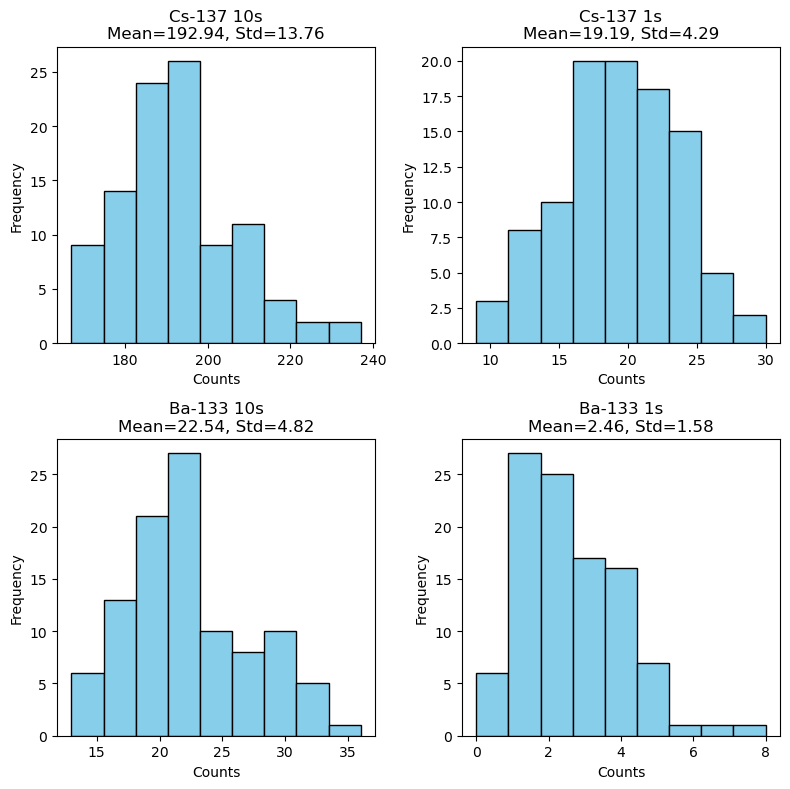

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Example: assume L is a list of 4 numpy arrays or lists
# L = [np.array([...]), np.array([...]), ...]

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()
datase=["Cs-137 10s","Cs-137 1s","Ba-133 10s","Ba-133 1s"]
for i in range(4):
    data = np.array(L[i])
    mean = np.mean(data)
    std = np.std(data)
    
    axs[i].hist(data, bins=9, color='skyblue', edgecolor='black')
    axs[i].set_title(f"{datase[i]}\nMean={mean:.2f}, Std={std:.2f}")
    axs[i].set_xlabel("Counts")
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



In [64]:
for i in range(4):
    data = np.array(L[i])
    mean = np.mean(data)
    std = np.std(data)
    print(f"Dataset {i+1} & {mean:.2f} & {std:.2f} \\\\")



Dataset 1 & 192.94 & 13.76 \\
Dataset 2 & 19.19 & 4.29 \\
Dataset 3 & 22.54 & 4.82 \\
Dataset 4 & 2.46 & 1.58 \\


In [65]:
# Create a DataFrame from your list of arrays
df_out = pd.DataFrame({
    "Col1": L[0],
    "Col2": L[1],
    "Col3": L[2],
    "Col4": L[3]
})

# Save to a tab-separated text file
df_out.to_csv("outputa.txt", sep="\t", index=False)


In [66]:
import numpy as np
from ROOT import TH1F, TF1, TCanvas, gStyle, TColor, TPaveText, TLegend

# --- ROOT style settings ---
gStyle.SetOptStat(1)   # No default statistics box
gStyle.SetOptFit(0)    # No automatic fit results
gStyle.SetTitleFont(42, "xyz") # Nicer font
gStyle.SetLabelFont(42, "xyz")
gStyle.SetTitleSize(0.04, "xyz")
gStyle.SetLabelSize(0.03, "xyz")
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadBottomMargin(0.12)
gStyle.SetPadLeftMargin(0.12)
gStyle.SetPadRightMargin(0.08)

# --- Setup canvas ---
c = TCanvas("", "", 800, 600)
#c.Divide(2,2)
# --- Read your data ---
data = np.loadtxt("outputa.txt", delimiter="\t", skiprows=1)
hist_list=[]
# --- Histogram and fitting loop ---
for i in [0]:
    col1_data = data[:, i]
    #c.cd(i+1)
    # --- Histogram creation ---
    hist = TH1F(f"", f"Cesium-137 10s sampling", 7, min(col1_data), max(col1_data))
    hist.SetDirectory(0)
    hist.SetFillColorAlpha(4, 0.4)  # Blue fill with transparency
    hist.SetLineColor(1)
    hist.SetLineWidth(2)
    hist.SetFillStyle(1001)

    for value in col1_data:
        hist.Fill(value)

    # --- Gaussian fit ---
    gauss_fit = TF1(f"gauss_fit_{i}", "[0]*exp(-0.5*((x-[1])/[2])**2)", min(col1_data), max(col1_data))
    gauss_fit.SetParameters(1, (min(col1_data) + max(col1_data)) / 2.0, 4)
    gauss_fit.SetParName(0, "GAmplitude")
    gauss_fit.SetParName(1, "GMean")
    gauss_fit.SetParName(2, "GSigma")
    gauss_fit.SetLineColor(TColor.GetColor(0, 200, 0))  # Green
    gauss_fit.SetLineWidth(3)
    hist.Fit(gauss_fit, "Q")  # Quiet fitting

    # Store Gaussian parameters
    gauss_params = [gauss_fit.GetParameter(j) for j in range(3)]
    gauss_errors = [gauss_fit.GetParError(j) for j in range(3)]

    # --- Poisson fit ---
    poisson_fit = TF1(f"poisson_fit_{i}", "[0] * TMath::Poisson(x, [1])", 0, max(col1_data))
    poisson_fit.SetParameters(1, (min(col1_data) + max(col1_data)) / 2.0)
    poisson_fit.SetParName(0, "PAmplitude")
    poisson_fit.SetParName(1, "PLambda")
    poisson_fit.SetLineColor(TColor.GetColor(255, 0, 0))  # Red
    poisson_fit.SetLineWidth(3)
    hist.Fit(poisson_fit, "Q")

    # Store Poisson parameters
    poisson_params = [poisson_fit.GetParameter(j) for j in range(2)]
    poisson_errors = [poisson_fit.GetParError(j) for j in range(2)]
    hist_list.append(hist)
    # --- Draw everything ---
    hist.Draw()
    gauss_fit.Draw("same")
    poisson_fit.Draw("same")

    # --- Add custom parameter box (TPaveText) ---
    stats_box = TPaveText(0.6, 0.6, 0.88, 0.83, "NDC")
    stats_box.SetFillColor(0)
    stats_box.SetTextFont(42)
    stats_box.SetTextSize(0.03)
    stats_box.SetBorderSize(1)

    stats_box.AddText("Gaussian Fit:")
    stats_box.AddText(f"Mean = {gauss_params[1]:.3f} ± {gauss_errors[1]:.3f}")
    stats_box.AddText(f"Sigma = {-gauss_params[2]:.3f} ± {gauss_errors[2]:.3f}")
    stats_box.AddText("Poisson Fit:")
    stats_box.AddText(f"Lambda = {poisson_params[1]:.3f} ± {poisson_errors[1]:.3f}")
    stats_box.Draw()

    # --- Add a legend ---
    legend = TLegend(0.55, 0.4, 0.85, 0.5)
    legend.AddEntry(gauss_fit, "Gaussian Fit", "l")
    legend.AddEntry(poisson_fit, "Poisson Fit", "l")
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.SetTextSize(0.03)
    legend.Draw()

    c.Update()



In [67]:
from ROOT import TH1F, TF1
# Step 1: Read the data from the text file
data = np.loadtxt("output.txt", delimiter="\t", skiprows=1)  # Skip the header row
hist_list=[]
bin_list=[8,10,7,7]
# Extract the first column (Col1)
for i in range(4):
    col1_data = data[:, i]

    hist = TH1F("", f"Dataset {i+1}", bin_list[i], min(col1_data), max(col1_data))
    hist.SetDirectory(0)   
    for value in col1_data:
        hist.Fill(value)

    gauss_fit = TF1("gauss_fit", "[0]*exp(-0.5*((x-[1])/[2])**2)", min(col1_data), max(col1_data))
    gauss_fit.SetParameters(1, (min(col1_data) + max(col1_data)) / 2.0, 4)
    gauss_fit.SetParName(0, "GAmplitude")
    gauss_fit.SetParName(1, "GMean")
    gauss_fit.SetParName(2, "GSigma")
    gauss_fit.SetLineColor(TColor.GetColor(0, 200, 0))  
    gauss_fit.SetLineWidth(3)
    hist.Fit(gauss_fit, "SN")  # Fit using Gaussian (drawn automatically)
    print(f"Fitting Gaussian: \n mean={gauss_fit.GetParameter(1):.5g}---sigma={gauss_fit.GetParameter(2):.5g}")
    # Step 4: Poisson fit
    poisson_fit = TF1("poisson_fit", "[0] * TMath::Poisson(x, [1])", 0, max(col1_data))
    poisson_fit.SetParameters(1, (min(col1_data) + max(col1_data)) / 2.0)  # Set initial values for Poisson fit
    poisson_fit.SetParName(0, "PAmplitude")
    poisson_fit.SetParName(1, "PLambda")
    poisson_fit.SetLineColor(TColor.GetColor(255, 0, 0))
    poisson_fit.SetLineWidth(3)
    hist.Fit(poisson_fit, "SN")  # Fit using Poisson
    print(f"Fitting Poisson: \n mean={poisson_fit.GetParameter(1):.5g}---sigma(mean^(1/2))={np.sqrt(poisson_fit.GetParameter(1)):.5g}")
    hist_list.append(hist)

FileNotFoundError: output.txt not found.

voltage tuning 

In [ ]:
v=[300+20*i for i in range(11)]
count=[0,0,0,1825,1795,1798,1863,1854,1981,1912,1985]

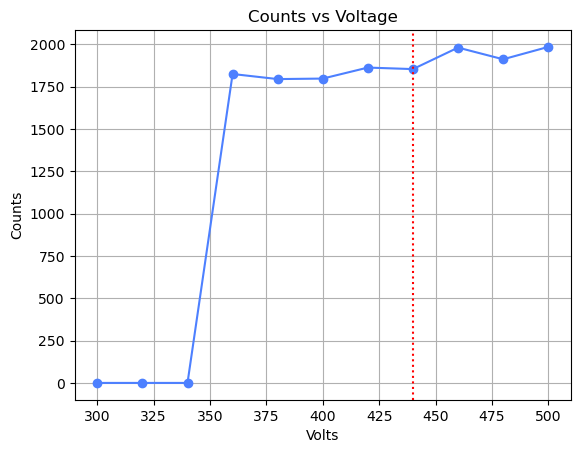

In [ ]:

# Create the plot

plt.plot(v, count, marker='o', linestyle='-', color=(0.3, 0.5, 1.0), label='Data')

# Add vertical dotted line at x = 440
plt.axvline(x=440, color='r', linestyle=':')

# Labels
plt.xlabel('Volts')
plt.ylabel('Counts')

# Title (optional)
plt.title('Counts vs Voltage')

# Show grid (optional)
plt.grid(True)

# Show the plot
plt.show()


Part B

In [ ]:
with open('partb.txt', 'r') as file:
    numbers = [int(line.strip()) for line in file if line.strip()]

In [ ]:
def intervals(l,n):
    result=[]
    count=0
    temp=[]
    for i in l:
        count+=1
        temp.append(i)
        if count==n:
            result.append(sum(temp))
            count=0
            temp=[]
    return result        

In [ ]:
peaks=len(numbers)
interval=sum(numbers)
alpha=peaks/interval
print(interval)

1119


In [ ]:
numbers

[4,
 5,
 4,
 1,
 5,
 6,
 32,
 6,
 12,
 18,
 14,
 1,
 4,
 9,
 5,
 5,
 18,
 3,
 7,
 7,
 3,
 2,
 8,
 4,
 2,
 4,
 21,
 8,
 6,
 66,
 32,
 17,
 4,
 17,
 11,
 3,
 9,
 16,
 6,
 14,
 12,
 6,
 15,
 6,
 6,
 2,
 11,
 11,
 7,
 3,
 3,
 11,
 4,
 27,
 18,
 6,
 4,
 30,
 9,
 12,
 10,
 15,
 6,
 13,
 3,
 25,
 7,
 35,
 9,
 16,
 6,
 2,
 11,
 8,
 26,
 18,
 8,
 2,
 23,
 2,
 23,
 2,
 40,
 15,
 8,
 2,
 9,
 5,
 2,
 5,
 1,
 15,
 6,
 11,
 12,
 9,
 3,
 21,
 7,
 8,
 7,
 34,
 7]

In [ ]:
for i in [1,2]:
    with open(f"n={i-1}.txt", "w") as file:
        for item in intervals(numbers,i):
            file.write(f"{item}\n")


In [ ]:
intervals(numbers,2)

[9,
 5,
 11,
 38,
 30,
 15,
 13,
 10,
 21,
 14,
 5,
 12,
 6,
 29,
 72,
 49,
 21,
 14,
 25,
 20,
 18,
 21,
 8,
 22,
 10,
 14,
 31,
 24,
 34,
 21,
 25,
 19,
 28,
 42,
 25,
 8,
 19,
 44,
 10,
 25,
 25,
 55,
 10,
 14,
 7,
 16,
 17,
 21,
 24,
 15,
 41]

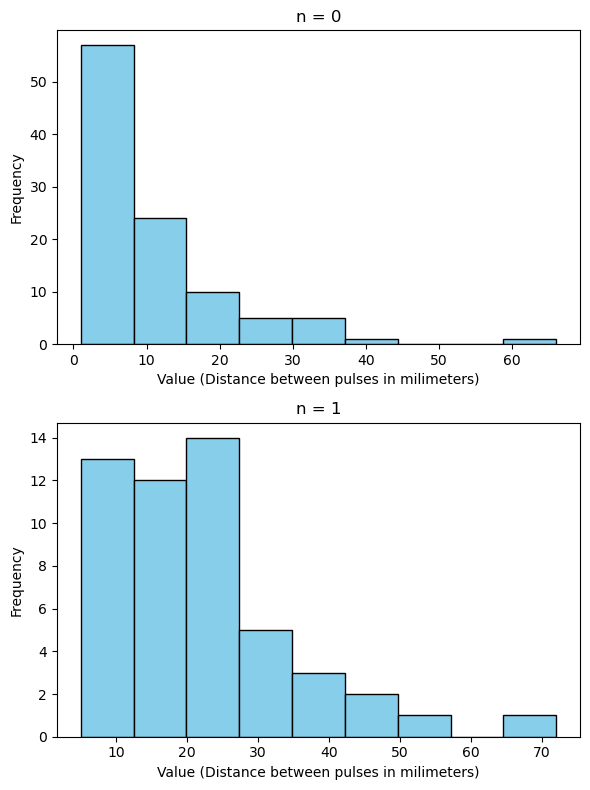

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(6, 8))

for i in range(2):
    axs[i].hist(intervals(numbers,i+1),9,color='skyblue', edgecolor='black')
    axs[i].set_title(f"n = {i}")
    axs[i].set_xlabel("Value (Distance between pulses in milimeters)")
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
L2=[intervals(numbers,1),intervals(numbers,2)]

In [ ]:

# --- ROOT style settings ---
gStyle.SetOptStat(1)   # No default statistics box
gStyle.SetOptFit(1111)    # No automatic fit results
gStyle.SetTitleFont(42, "xyz") # Nicer font
gStyle.SetLabelFont(42, "xyz")
gStyle.SetTitleSize(0.04, "xyz")
gStyle.SetLabelSize(0.03, "xyz")
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadBottomMargin(0.12)
gStyle.SetPadLeftMargin(0.12)
gStyle.SetPadRightMargin(0.08)

# --- Setup canvas ---
c = TCanvas("", "", 1000, 600)
#c.Divide(2,1)
# --- Read your data ---
hist_list=[]
# --- Histogram and fitting loop ---
for i in [1]:
    col1_data = L2[i]
    #c.cd(i+1)
    # --- Histogram creation ---
    hist = TH1F(f"", f"n={i}", 9, min(col1_data), max(col1_data))
    hist.SetDirectory(0)
    hist.SetFillColorAlpha(4, 0.4)  # Blue fill with transparency
    hist.SetLineColor(1)
    hist.SetLineWidth(2)
    hist.SetFillStyle(1001)

    for value in col1_data:
        hist.Fill(value)

    # --- Gaussian fit ---
    if i == 0:
        
        func = TF1("n0", "[0]*[1]*exp(-[1]*x)", min(col1_data), max(col1_data))
        func.SetParameter(0, 1.0)
        func.SetParameter(1, alpha)
        bin_min = hist.FindBin(min(col1_data))
        bin_max = hist.FindBin(max(col1_data))
        integral1 = hist.Integral(bin_min, bin_max, "width")  # scaled by bin width
        integral2 = func.Integral(min(col1_data), max(col1_data))
        scale = integral1 / integral2
        func.SetParameter(0, func.GetParameter(0) * scale),min(col1_data), max(col1_data)
        func.SetLineWidth(3)
        n0_fit = TF1(f"n0_fit_{i}", "[0]*[1]*exp(-[1]*x)", min(col1_data), max(col1_data))
        n0_fit.SetParameters(10,0.1)
        n0_fit.SetParName(0, "Amplitude")
        n0_fit.SetParName(1, "Alpha")
        n0_fit.SetLineColor(TColor.GetColor(0, 200, 0))  # Green
        n0_fit.SetLineWidth(3)
        hist.Fit(n0_fit, "SQ")  # Quiet fitting
        fit=n0_fit
    # Store Gaussian parameters
        n0_params = [n0_fit.GetParameter(j) for j in range(3)]
        n0_errors = [n0_fit.GetParError(j) for j in range(3)]
        hist_list.append(hist)
        hist.Draw()
        n0_fit.Draw("same")
        func.Draw("same")
    if i==1:
        func = TF1("n0", "[0]*x*([1]**2)*exp(-[1]*x)", min(col1_data), max(col1_data))
        func.SetParameter(0, 1.0)
        func.SetParameter(1, alpha)
        bin_min = hist.FindBin(min(col1_data))
        bin_max = hist.FindBin(max(col1_data))
        integral1 = hist.Integral(bin_min, bin_max, "width")  # scaled by bin width
        integral2 = func.Integral(min(col1_data), max(col1_data))
        scale = integral1 / integral2
        func.SetParameter(0, func.GetParameter(0) * scale),min(col1_data), max(col1_data)
        func.SetLineWidth(3)
        n1_fit = TF1(f"n1_fit_{i}", "[0]*x*([1]**2)*exp(-[1]*x)", min(col1_data), max(col1_data))
        n1_fit.SetParameters(10,0.1)
        n1_fit.SetParName(0, "Amplitude")
        n1_fit.SetParName(1, "Alpha")
        n1_fit.SetLineColor(TColor.GetColor(0, 200, 0))  # Red
        n1_fit.SetLineWidth(3)
        hist.Fit(n1_fit, "SQ")
        fit=n1_fit
        # Store Poisson parameters
        n1_params = [n1_fit.GetParameter(j) for j in range(2)]
        n1_errors = [n1_fit.GetParError(j) for j in range(2)]
        hist_list.append(hist)
        # --- Draw everything ---
        hist.Draw()
        n1_fit.Draw("same")
        func.Draw("same")
    

    # --- Add a legend ---
    legend = TLegend(0.55, 0.4, 0.85, 0.5)
    legend.AddEntry(func, "Theoretical Dist.", "l")
    legend.AddEntry(fit, "Poisson Fit", "l")
    legend.SetBorderSize(0)
    legend.SetFillStyle(0)
    legend.SetTextSize(0.03)
    legend.Draw()

    c.Update()



In [ ]:
import math 
def func(x,n):
    return ((alpha*x)**n)*np.exp(-alpha*x)*alpha/math.factorial(n)

In [ ]:
n0_fit = TF1(f"n0_fit_{i}", "[0]*exp(-[0]*x)", min(col1_data), max(col1_data))
n1_fit = TF1(f"n1_fit_{i}", "x*([0]**2)*exp(-[0]*x)", min(col1_data), max(col1_data))
